# Domain Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('cellphoneprice.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


**1. battery_power :** Total energy a battery can store in one time measured in mAh

**2. blue :** Has bluetooth or not

**3. clock_speed :** speed at which microprocessor executes instructions

**4. dual_sim :** Has dual sim support or not

**5. fc :** Front Camera mega pixels

**6. four_g :** Has 4G or not

**7. int_memory :** Internal Memory in Gigabytes

**8. m_dep :** Mobile Depth in cm

**9. mobile_wt :** Weight of mobile phone

**10. n_cores :** Number of cores of processor

**11. pc :** Primary Camera mega pixels

**12. px_height :** Pixel Resolution Height

**13. px_width :** Pixel Resolution Width

**14. ram :** Random Access Memory in Megabytes

**15. sc_h :** Screen Height of mobile in cm

**16. sc_w :** Screen Width of mobile in cm

**17. talk_time :** longest time that a single battery charge will last when you are

**18. three_g :** Has 3G or not

**19. touch_screen :** Has touch screen or not

**20. wifi :** Has wifi or not

**21. price_range :** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).




# Basic Checks

In [7]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data.shape

(2000, 21)

In [11]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Exploratory Data Analysis

### Univariate Analysis

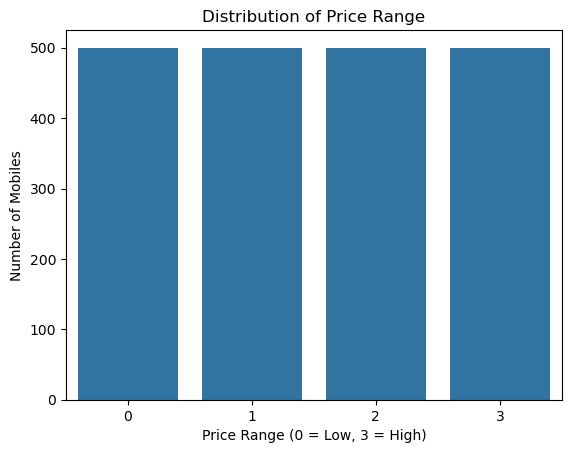

In [14]:
sns.countplot(x='price_range', data=data)
plt.title("Distribution of Price Range")
plt.xlabel("Price Range (0 = Low, 3 = High)")
plt.ylabel("Number of Mobiles")
plt.show()

### Insights:

* Each price range (0 to 3) has approximately 500 mobile phones.

* This suggests the dataset is evenly balanced across all price categories.

* The x-axis indicates the price range, where 0 = Low, 3 = High. This categorization enables analysis across four distinct segments: low, mid-low, mid-high, and high.

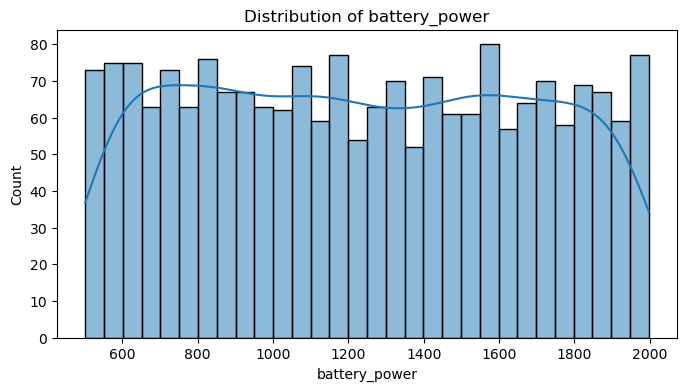

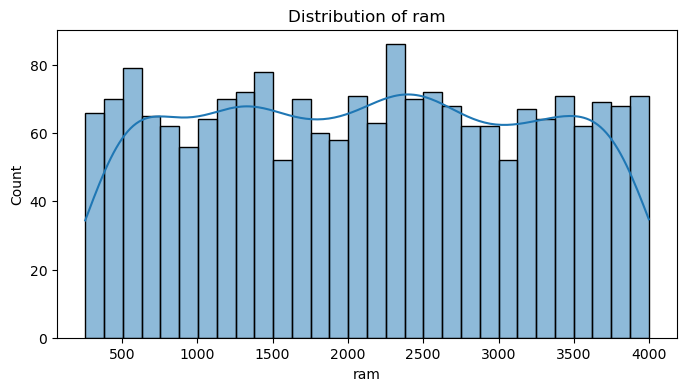

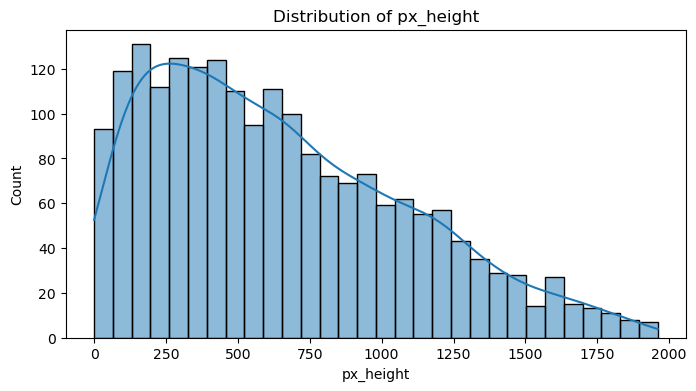

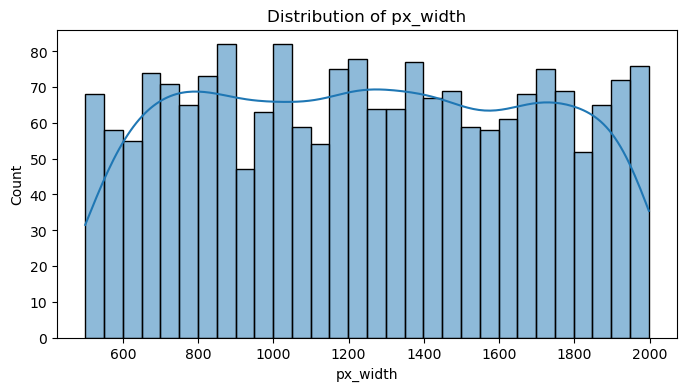

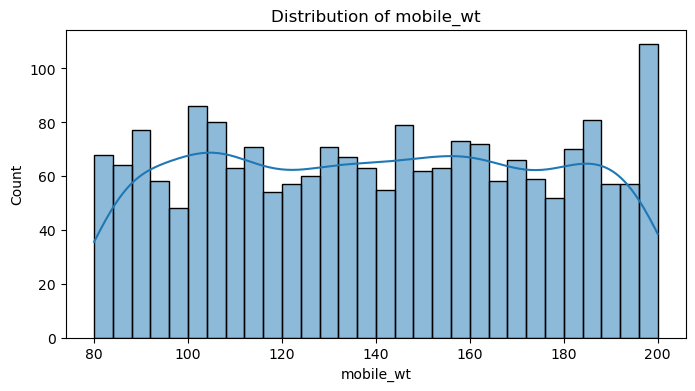

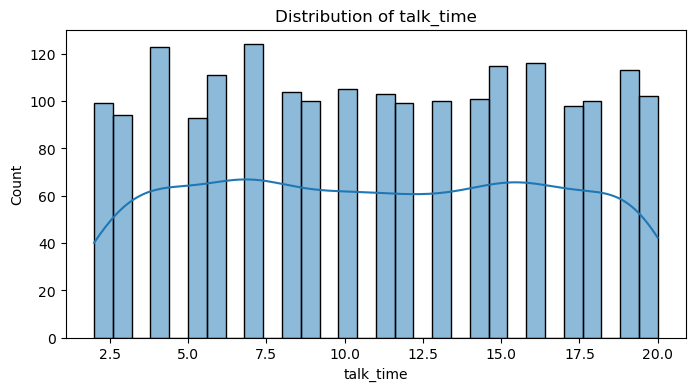

In [16]:
numerical_cols = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'talk_time']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Insights:

**1. Disribution of battery_power**

* Battery capacities range approximately from 500 mAh to 2000 mAh.

* This suggests a wide variation in battery performance among mobile phones in the dataset.

* Most battery_power values are evenly spread across the entire range.

* There is no strong skew, though slightly more phones are in the lower battery range (~500–700 mAh).

* The KDE (Kernel Density Estimation) line provides a smoothed view of the distribution.


**2. Disribution of ram**

* RAM values range from around 250 MB to 4000 MB (4 GB).

* This is a typical range seen in entry-level to mid-range smartphones.

* Like battery power, RAM is also evenly spread across its range.

* Most bins have a count between 140 and 175 phones, indicating a well-balanced dataset.

* The histogram and KDE curve show no strong skew, and the distribution is roughly symmetric.


**3. Distribution of px_height**

* The distribution is positively skewed (right-skewed), meaning:

* Most phones have lower pixel heights, particularly between 0 and 700 pixels.

* A smaller number of phones have higher pixel heights, up to around 2000 pixels.

* The most frequent pixel height values are between 200–500 pixels.


**4. Distribution of px_width**

* px_width ranges from approximately 500 to 2000 pixels.

* This suggests a dataset that includes both lower-resolution and high-resolution phones.

* The histogram shows a fairly uniform distribution, with most bins having counts in the 50–85 range.

* Unlike px_height (which was right-skewed), px_width is more evenly distributed across its range.


**5. Distribution of mobile_wt**

* mobile_wt (mobile weight) spans from approximately 80g to 200g.

* This is a realistic and practical range for smartphones — from lightweight models to heavier, feature-rich devices.

* The histogram is relatively evenly distributed, with most bins having 50–85 phones.


**6. Distribution of talk_time**

* talk_time values span from 2 to 20 hours.

* This range is realistic and includes both low-end and high-end battery performance phones.

* The histogram is nearly uniform.

* This indicates the dataset is well-balanced across all talk time ranges, with no major gaps or skew.

### Bivariate Analysis

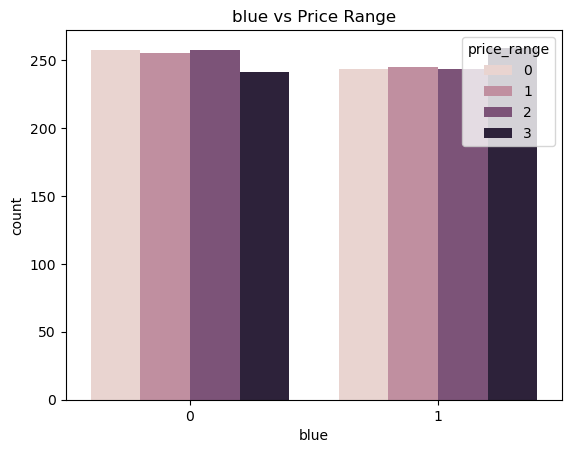

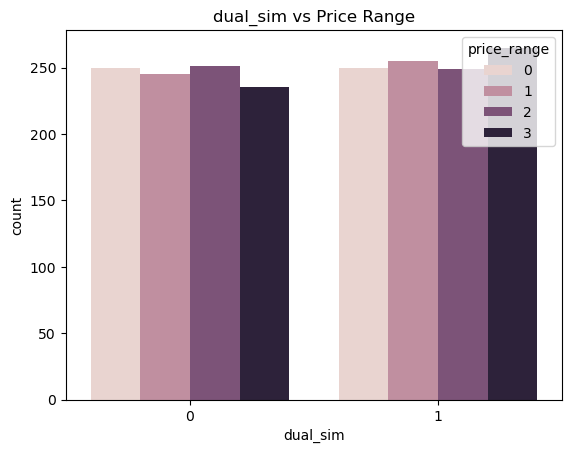

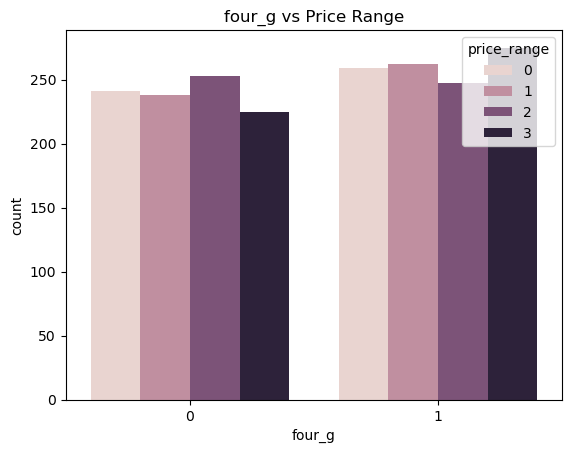

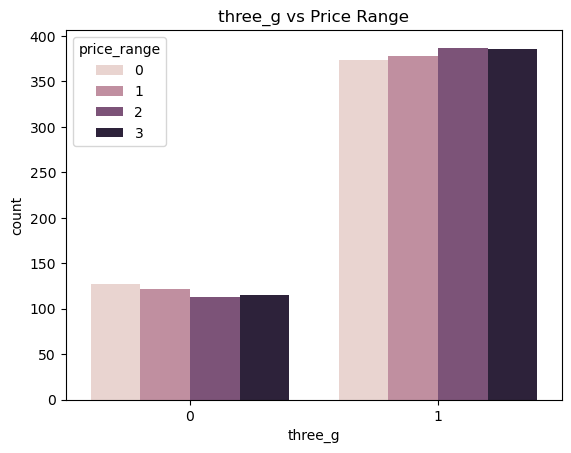

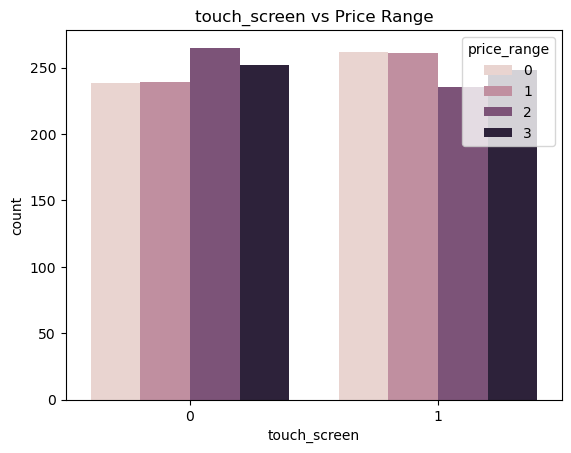

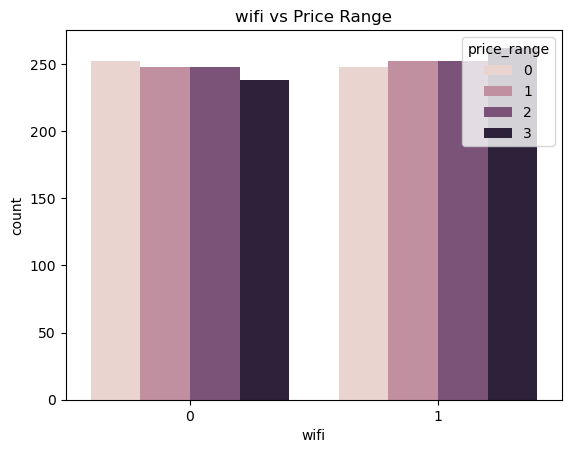

In [19]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in binary_cols:
    sns.countplot(x=col, hue='price_range', data=data)
    plt.title(f'{col} vs Price Range')
    plt.show()

### Insights:

**1. blue vs Price Range**

* The number of mobiles with (1) and without (0) Bluetooth is nearly equal.

* Within each Bluetooth category (0 and 1), all four price ranges (0 to 3) are evenly represented.

* The heights of the bars across price ranges are very similar.

* Suggests that Bluetooth is not a strong differentiator between lower and higher-priced phones in this dataset.

* There is a minor dip in count for price range 3 among phones without Bluetooth (blue = 0).

* This suggests that high-end phones are more likely to have Bluetooth, which aligns with real-world expectations.


**2. dual_sim vs Price Range**

* Both dual_sim = 0 and dual_sim = 1 categories have similar total counts. Indicates an equal market split between single and dual SIM devices.

* Each price range (0 to 3) is similarly represented in both dual SIM and non-dual SIM phones.

* The bar heights across different price ranges are very close for both categories.

* There is a small increase in counts for price ranges 1 and 2 in dual SIM phones.

* Suggests mid-range phones are slightly more likely to have dual SIM support.

* Conversely, price range 3 (high-end) shows a very mild dip in the dual SIM group.


**3. four_g vs Price Range**

* The total number of phones with and without 4G support is similar, indicating 4G is not exclusive to high-end models.

* Among non-4G phones (four_g = 0), there's a slight dip in the highest price range (3). Suggests expensive phones usually have 4G.

* Among 4G phones, the representation across all price ranges is quite uniform, but price range 2 (upper-mid range) shows slightly stronger presence.

* Price range 0 and 1 have significant counts of 4G phones.


**4. three_g vs Price Range**

* Most phones have 3G support

* The right group of bars (three_g = 1) has significantly higher counts than the left (three_g = 0), across all price ranges.

* 3G is common in all price ranges:

* Within three_g = 1, the distribution across all price ranges (0 to 3) is relatively even and high, especially in higher ranges. This suggests that 3G is a standard feature in modern phones, even in mid to low price ranges.

* Phones without 3G are fewer and mostly lower-priced

* The bars for three_g = 0 are much shorter.

* Slightly higher counts in lower price ranges (0 and 1).

* Very few phones without 3G fall into higher price ranges, indicating 3G is expected in higher-end phones.


**5. touch_screen vs Price Range**

* Touch screens are evenly distributed.

* The counts for phones with (1) and without (0) touch screens are very similar across all price ranges. This suggests that touch screens alone are not a strong differentiator in pricing.

* All price ranges have touch and non-touch phones.

* Each bar group includes phones from all four price ranges. This further supports the idea that having a touch screen is not exclusive to either low-end or high-end phones.

* Slight trend differences

* For touch screen phones (1), the lower price ranges (0 and 1) are slightly more common than the higher ones (2 and 3).

* For non-touch phones (0), the higher price ranges (2 and 3) are slightly more frequent, which is counterintuitive, as one might expect touch screens to dominate the premium segment.


**6. wifi vs Price Range**

* Very balanced distribution.

* Phones with (1) and without (0) Wi-Fi are almost equal in number.

* Each group (Wi-Fi and non-Wi-Fi) contains a fair distribution across all four price ranges.

* Wi-Fi is not exclusive to higher-priced phones.

* Contrary to expectations, non-Wi-Fi phones exist in all price ranges, including the highest one (price_range = 3).

* Similarly, Wi-Fi phones are present even in the lowest price range (price_range = 0).

* There is a minor decrease in count for non-Wi-Fi phones in the highest price range (3), compared to others.

* Wi-Fi-enabled phones show slightly higher counts in price ranges 1, 2, and 3.

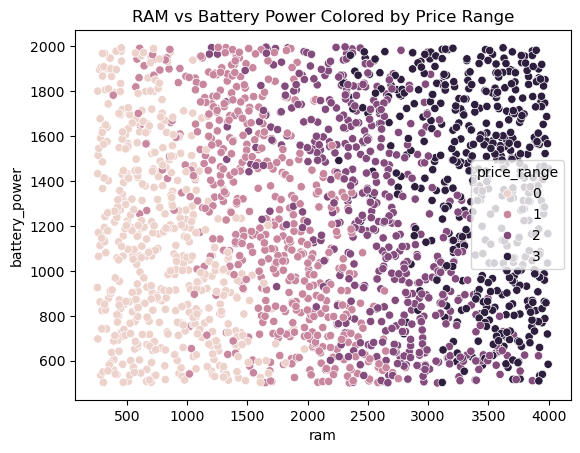

In [21]:
sns.scatterplot(x='ram', y='battery_power', hue='price_range', data=data)
plt.title("RAM vs Battery Power Colored by Price Range")
plt.show()

**ram vs battery power colored by Price Range**

* Strong correlation between RAM and price range.

* Clear gradient from left to right: Lighter points (lower price) are clustered on the left (low RAM), while darker points (higher price) dominate the right (high RAM).

* RAM is a strong predictor of price range.

* Battery power is less correlated with price.

* Points of all price ranges are distributed across all battery power levels.

* There is no clear upward or downward trend in price with increasing battery power.

* Suggests battery power alone does not heavily influence price.


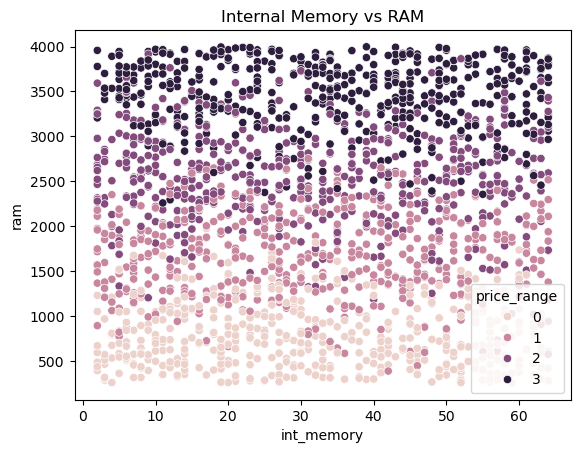

In [23]:
sns.scatterplot(x='int_memory', y='ram', hue='price_range', data=data)
plt.title("Internal Memory vs RAM")
plt.show()

**internal memory vs ram colored by Price Range**

* Strong upward trend in price with RAM.

* Clear vertical gradient: Lighter shades (low price) dominate the bottom (low RAM), while darker shades (high price) dominate the top (high RAM).

* Confirms previous findings: RAM is a major price driver.

* Weaker correlation with internal memory.

* There’s no strong horizontal gradient in price as internal memory increases.

* Phones with low internal memory (e.g., <16 GB) can still fall into higher price ranges if RAM is high.

* Likewise, phones with high internal memory (e.g., >32 GB) can be low-priced if RAM is low.


# Data Preprocessing

In [26]:
# Checking for missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [27]:
# There is no missing values

In [28]:
# Checking for duplicates
data.duplicated().sum()

0

In [29]:
# There is no duplicated records

In [30]:
# This data does not contain categorical variable. So there is no need to do encoding

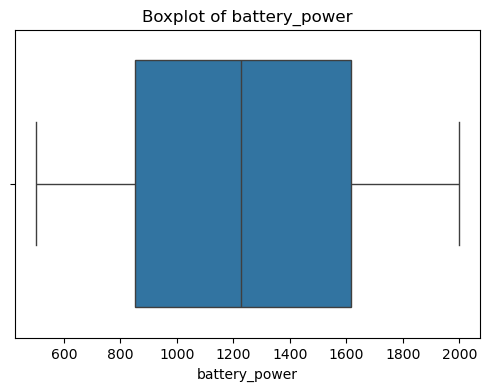

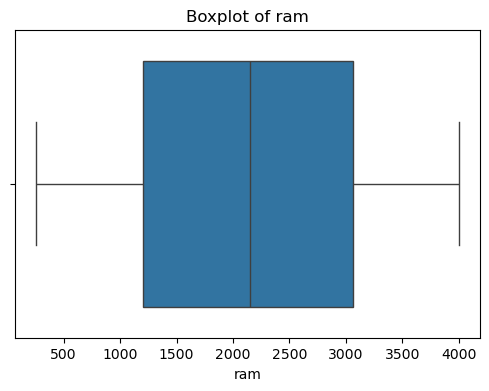

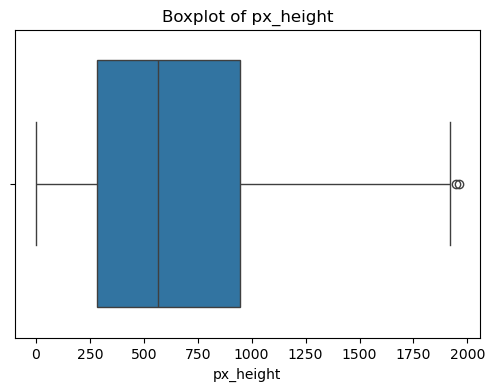

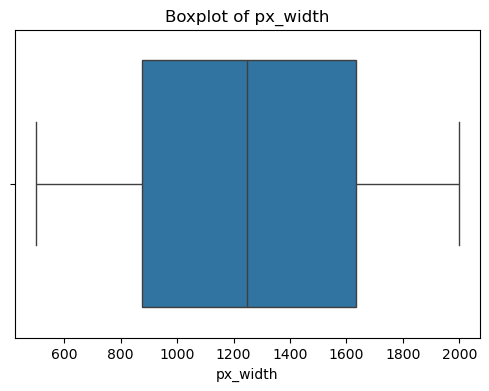

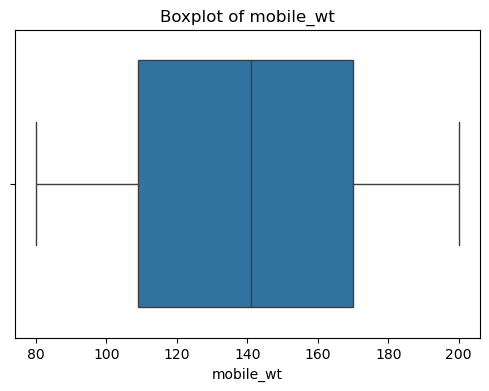

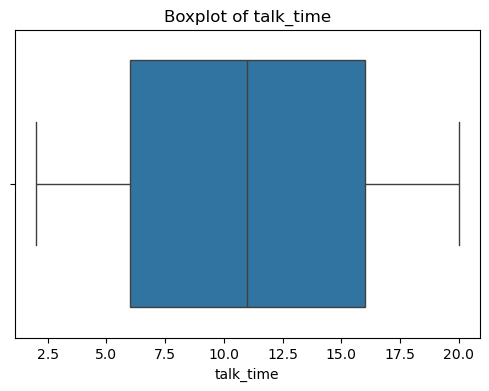

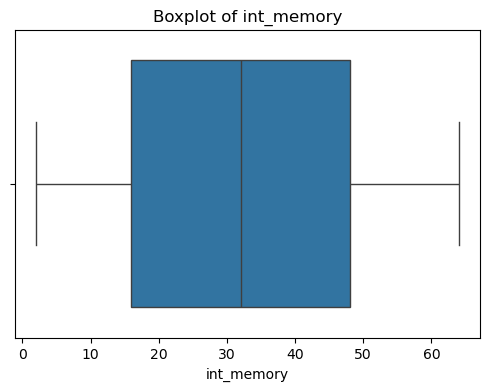

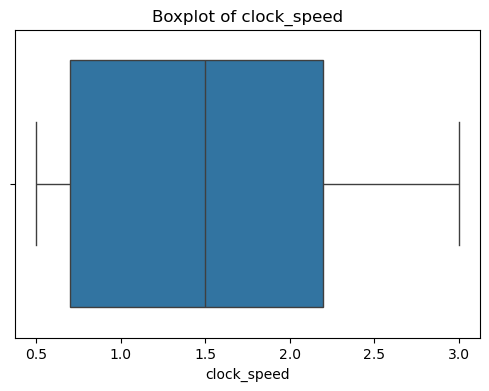

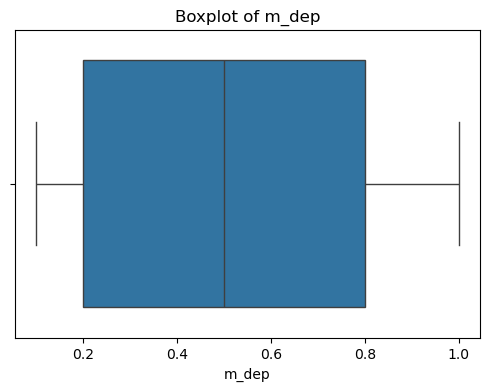

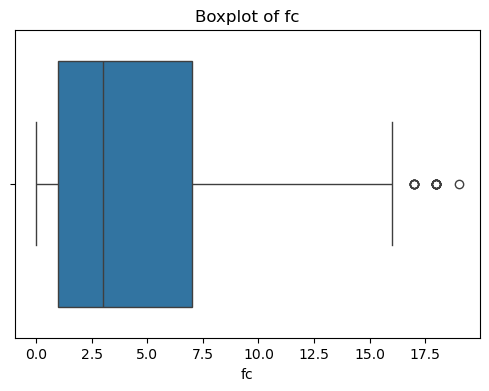

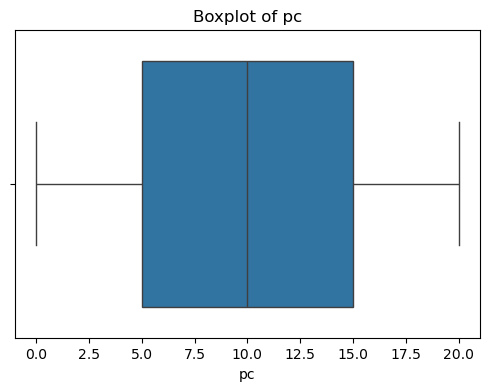

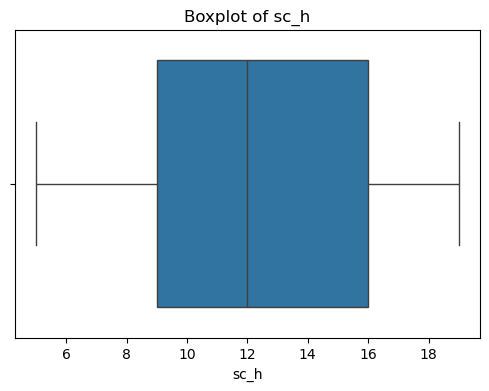

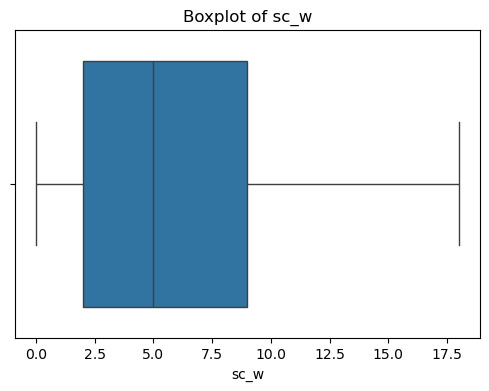

In [31]:
# Checking for outliers
numerical_cols = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'talk_time', 'int_memory', 'clock_speed', 'm_dep', 'fc', 'pc', 'sc_h', 'sc_w']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [32]:
# This data does not contain any outliers

# Feature Selection

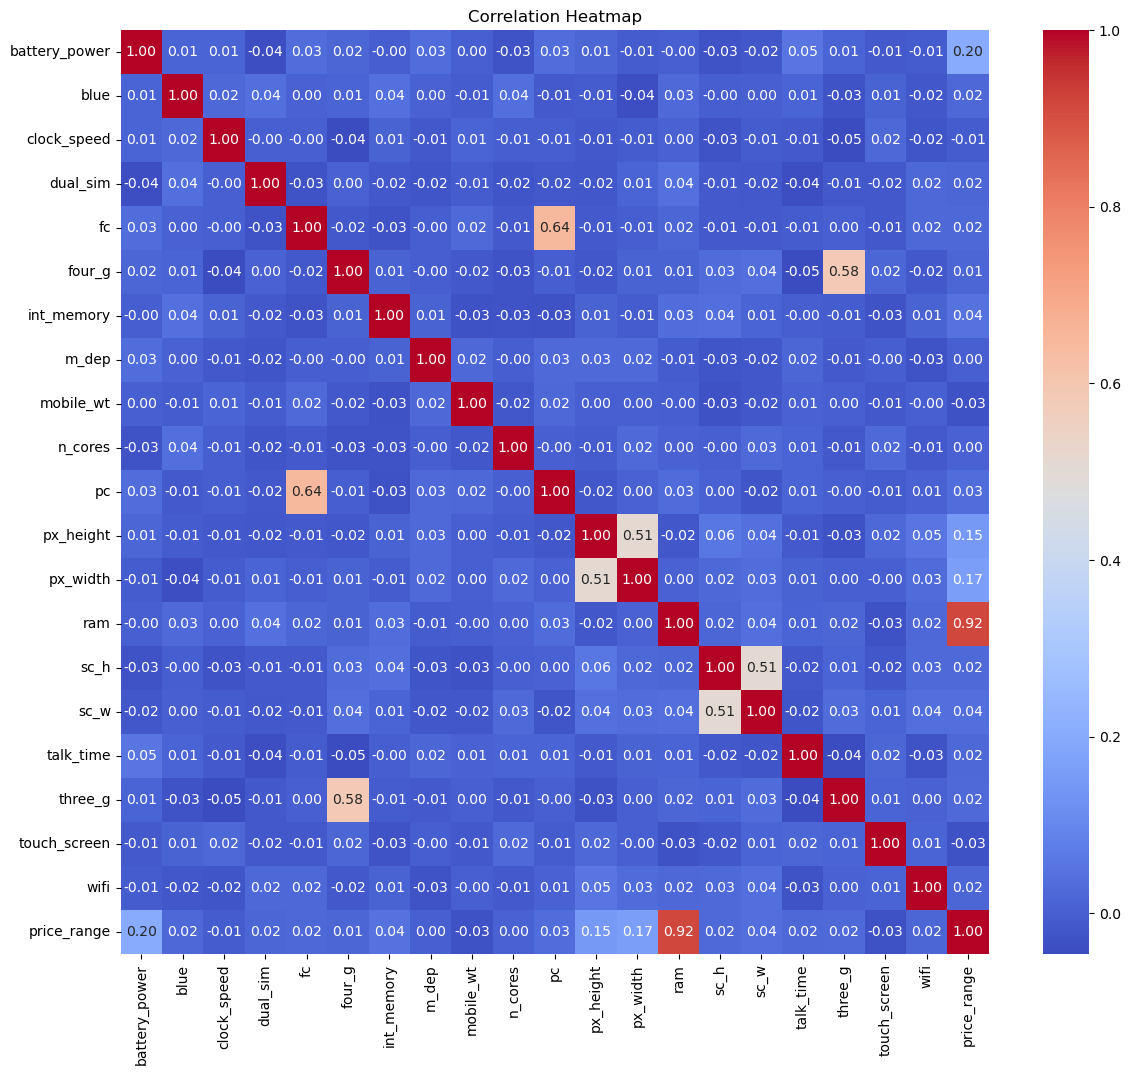

In [34]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Insights:

**Strong Positive Correlations:**

1. ram and price_range:

* Correlation: 0.92

* RAM is very strongly correlated with the price range — higher RAM generally means a higher price. Likely one of the most predictive features for price.

2. fc and pc:

* Correlation: 0.64

* The front camera (fc) and primary camera (pc) are strongly correlated, which makes sense as better devices often have better cameras on both sides.

3. four_g and three_g:

* Correlation: 0.58

* Devices that support 4G often support 3G as well. High feature overlap here.

4. px_height and px_width:

* Correlation: 0.51

* These dimensions are moderately correlated — higher pixel height often comes with higher width, indicating screen resolution increases proportionally.


 **Weak or No Correlation:**

* Many variables such as battery_power, clock_speed, dual_sim, touch_screen, and wifi have very low or near-zero correlations with each other and even with the target (price_range).

* Suggests that some of these features may not significantly influence price, or may require nonlinear models to capture their effect.

# Model Creation and Evaluation

In [37]:
# Creating dependent and independent variable
x = data.drop('price_range', axis=1)
y = data['price_range']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## Logistics Regression

In [40]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_train_predict=LR.predict(x_train)
y_train_predict

array([0, 3, 0, ..., 1, 2, 2], dtype=int64)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(confusion_matrix(y_train,y_train_predict))

[[307  83   5   0]
 [ 66 227  95  21]
 [  1  95 192 120]
 [  0   1  96 291]]


In [44]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       395
           1       0.56      0.56      0.56       409
           2       0.49      0.47      0.48       408
           3       0.67      0.75      0.71       388

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.63      1600



In [45]:
y_test_predict=LR.predict(x_test)
y_test_predict

array([0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 0, 1, 2, 3, 3, 2, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 3, 3, 2, 2, 0,
       3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 3, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 2, 3, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 0, 1,
       0, 0, 3, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 1, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 2, 3, 1, 2, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 3, 0, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 2, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 3, 0, 2, 3, 1, 3, 1, 1, 2, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 2, 2, 0, 1, 0, 0, 3, 3,

In [46]:
print(confusion_matrix(y_test,y_test_predict))

[[79 25  1  0]
 [17 46 20  8]
 [ 0 17 46 29]
 [ 0  1 29 82]]


In [47]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



## K Nearest Neighbiors (KNN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Finding optimal value for k to determine how many nearest neighbors to find

In [51]:
error_rate=[]
for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_i=knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i!=y_test))
error_rate

[0.0725, 0.085, 0.0725, 0.07, 0.0575, 0.0575, 0.045, 0.06, 0.045, 0.05]

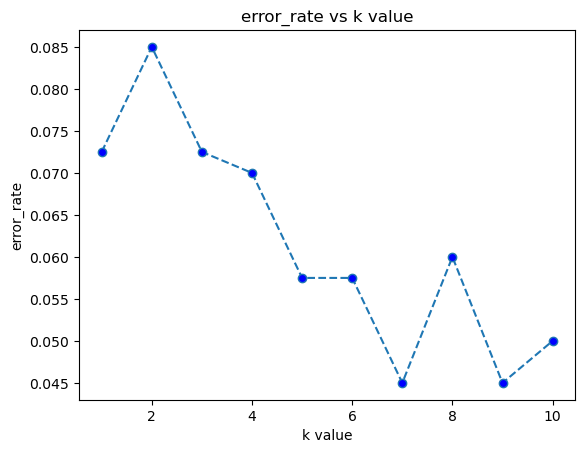

In [52]:
# Let's plot k value and error rate
plt.plot(range(1,11),error_rate,linestyle='dashed',marker='o',markerfacecolor='blue')
plt.title('error_rate vs k value')
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.show()

In [53]:
# Let's fit the data into KNN model
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_train_predict=KNN.predict(x_train)
y_train_predict

array([1, 2, 0, ..., 2, 3, 1], dtype=int64)

In [55]:
print(confusion_matrix(y_train,y_train_predict))

[[382  13   0   0]
 [ 11 389   9   0]
 [  0  17 379  12]
 [  0   0  23 365]]


In [56]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       395
           1       0.93      0.95      0.94       409
           2       0.92      0.93      0.93       408
           3       0.97      0.94      0.95       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [57]:
y_test_predict=KNN.predict(x_test)
y_test_predict

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [58]:
print(confusion_matrix(y_test,y_test_predict))

[[102   3   0   0]
 [  3  87   1   0]
 [  0   4  87   1]
 [  0   0   6 106]]


In [59]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.93      0.96      0.94        91
           2       0.93      0.95      0.94        92
           3       0.99      0.95      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



## Support Vector Machine (SVM)

In [61]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(x_train,y_train)

SVC()

In [62]:
y_train_predict=SVC.predict(x_train)
y_train_predict

array([1, 3, 1, ..., 2, 3, 1], dtype=int64)

In [63]:
print(confusion_matrix(y_train,y_train_predict))

[[388   7   0   0]
 [ 12 390   7   0]
 [  0  22 373  13]
 [  0   0  13 375]]


In [64]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       395
           1       0.93      0.95      0.94       409
           2       0.95      0.91      0.93       408
           3       0.97      0.97      0.97       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [65]:
y_test_predict=SVC.predict(x_test)
y_test_predict

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [66]:
print(confusion_matrix(y_test,y_test_predict))

[[103   2   0   0]
 [  1  90   0   0]
 [  0   3  87   2]
 [  0   0   6 106]]


In [67]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_train_predict=DTC.predict(x_train)
y_train_predict

array([1, 2, 0, ..., 2, 3, 1], dtype=int64)

In [71]:
print(confusion_matrix(y_train,y_train_predict))

[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


In [72]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [73]:
y_test_predict=DTC.predict(x_test)
y_test_predict

array([0, 2, 1, 3, 1, 1, 2, 0, 2, 1, 0, 1, 1, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 2, 1, 3, 0, 2, 3, 1, 0,
       2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 0, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 1, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 0, 1, 2, 3, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 3, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 3, 2, 1, 0, 1, 0, 2, 3, 0, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 1, 0, 1, 3, 3,

In [74]:
print(confusion_matrix(y_test,y_test_predict))

[[ 88  17   0   0]
 [  9  76   6   0]
 [  0  13  64  15]
 [  0   0  12 100]]


In [75]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       105
           1       0.72      0.84      0.77        91
           2       0.78      0.70      0.74        92
           3       0.87      0.89      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.82      0.82       400



## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
y_train_predict=RFC.predict(x_train)
y_train_predict

array([1, 2, 0, ..., 2, 3, 1], dtype=int64)

In [79]:
print(confusion_matrix(y_train,y_train_predict))

[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


In [80]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [81]:
y_test_predict=RFC.predict(x_test)
y_test_predict

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 2, 2, 1, 0, 0, 2, 2, 2, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 2, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 3, 2, 1, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [82]:
print(confusion_matrix(y_test,y_test_predict))

[[100   5   0   0]
 [  5  82   4   0]
 [  0   9  77   6]
 [  0   0  15  97]]


In [83]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.85      0.90      0.88        91
           2       0.80      0.84      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [86]:
y_train_predict=GBC.predict(x_train)
y_train_predict

array([1, 2, 0, ..., 2, 3, 1], dtype=int64)

In [87]:
print(confusion_matrix(y_train,y_train_predict))

[[395   0   0   0]
 [  0 408   1   0]
 [  0   0 408   0]
 [  0   0   0 388]]


In [88]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [89]:
y_test_predict=GBC.predict(x_test)
y_test_predict

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [90]:
print(confusion_matrix(y_test,y_test_predict))

[[101   4   0   0]
 [  4  82   5   0]
 [  0   6  79   7]
 [  0   0  12 100]]


In [91]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



## XG Boost

In [93]:
!pip install xgboost

In [94]:
from xgboost import XGBClassifier
XGBC=XGBClassifier()
XGBC.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [95]:
y_train_predict=XGBC.predict(x_train)
y_train_predict

array([1, 2, 0, ..., 2, 3, 1], dtype=int64)

In [96]:
print(confusion_matrix(y_train,y_train_predict))

[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


In [97]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [98]:
y_test_predict=XGBC.predict(x_test)
y_test_predict

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 2, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 1, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [99]:
print(confusion_matrix(y_test,y_test_predict))

[[100   5   0   0]
 [  4  85   2   0]
 [  0   7  78   7]
 [  0   0  13  99]]


In [100]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.93      0.90        91
           2       0.84      0.85      0.84        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



## Artificial Neural Network (ANN)

In [102]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier()
ANN.fit(x_train,y_train)

MLPClassifier()

In [103]:
y_train_predict=ANN.predict(x_train)
y_train_predict

array([1, 2, 0, ..., 2, 2, 2], dtype=int64)

In [104]:
print(confusion_matrix(y_train,y_train_predict))

[[296  65  34   0]
 [ 15 149 231  14]
 [  0   6 328  74]
 [  0   0  87 301]]


In [105]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       395
           1       0.68      0.36      0.47       409
           2       0.48      0.80      0.60       408
           3       0.77      0.78      0.77       388

    accuracy                           0.67      1600
   macro avg       0.72      0.67      0.67      1600
weighted avg       0.72      0.67      0.67      1600



In [106]:
y_test_predict=ANN.predict(x_test)
y_test_predict

array([0, 2, 1, 2, 1, 3, 2, 0, 3, 2, 0, 1, 2, 2, 3, 2, 2, 3, 2, 0, 0, 2,
       2, 2, 0, 2, 3, 2, 2, 0, 1, 0, 3, 0, 2, 3, 2, 1, 2, 0, 2, 2, 3, 0,
       3, 2, 2, 1, 3, 1, 3, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 3, 3, 2, 2, 0,
       3, 3, 2, 2, 2, 2, 0, 1, 3, 0, 1, 3, 2, 2, 3, 2, 2, 0, 2, 3, 2, 3,
       3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 0, 0, 1, 1, 1, 3, 3, 0, 1, 2,
       0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 2, 3, 3, 2, 3, 3, 0, 2, 0, 2, 3, 1,
       2, 2, 0, 3, 2, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 2, 2, 3, 1, 3, 0,
       2, 3, 0, 2, 0, 2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 2,
       1, 3, 2, 0, 0, 0, 0, 1, 3, 2, 0, 3, 0, 0, 0, 0, 2, 3, 2, 1, 0, 2,
       2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 3, 2, 1, 0, 2, 3, 2, 3, 3,
       2, 3, 0, 3, 2, 2, 3, 3, 2, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 0, 2, 2,
       3, 2, 3, 0, 3, 2, 3, 3, 2, 0, 0, 2, 0, 3, 3, 1, 2, 1, 1, 3, 1, 2,
       0, 0, 2, 1, 2, 2, 3, 3, 3, 1, 0, 0, 2, 3, 3,

In [107]:
print(confusion_matrix(y_test,y_test_predict))

[[78 21  6  0]
 [ 6 34 45  6]
 [ 0  0 74 18]
 [ 0  0 31 81]]


In [108]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       105
           1       0.62      0.37      0.47        91
           2       0.47      0.80      0.60        92
           3       0.77      0.72      0.75       112

    accuracy                           0.67       400
   macro avg       0.70      0.66      0.66       400
weighted avg       0.71      0.67      0.67       400



## Model Evaluation Report

**Best Performing Models:**

* SVC (95% train, 96% test) and KNN (95% train, 95% test) show strong, consistent performance and generalize well.

* Gradient Boosting (100% train, 91% test) and Random Forest (100% train, 89% test) also perform well but show signs of slight overfitting.


**Underperforming Models:**

* Logistic Regression and ANN have low accuracy (~64% and 67% respectively).
